In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1- Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.  (2 marks)



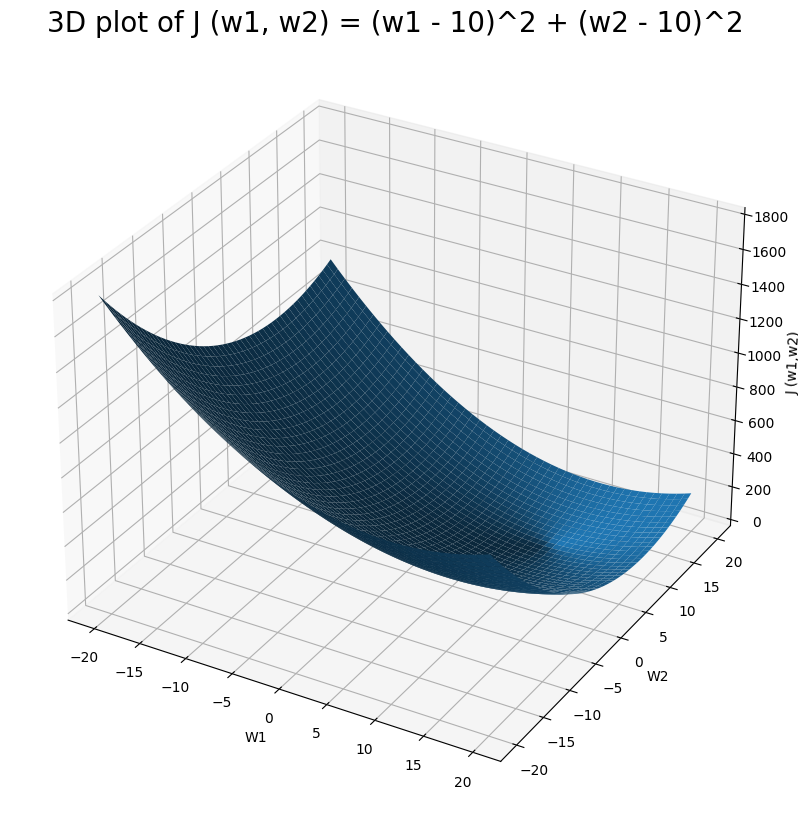

In [2]:
w1 = np.arange(-20,20,0.1)
w2 = np.arange(-20,20,0.1)

W1,W2 = np.meshgrid(w1,w2)

J = (W1-10)**2+(W2-10)**2
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
fig.set_figwidth(10)
fig.set_figheight(10)

ax.plot_surface(W1,W2,J)
ax.set_title("3D plot of J (w1, w2) = (w1 - 10)^2 + (w2 - 10)^2",
             fontsize=20)
ax.set_xlabel("W1")
ax.set_ylabel("W2")
ax.set_zlabel("J (w1,w2)")

plt.show()

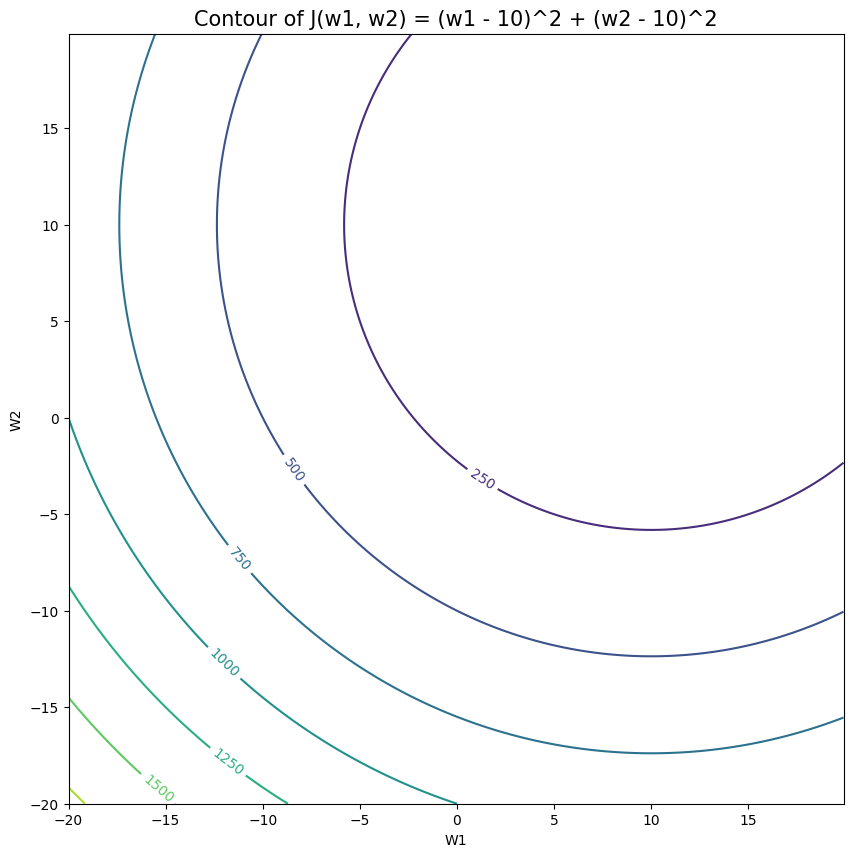

In [3]:
fig, ax1 = plt.subplots(1,figsize=(10,10))
fig.set_figwidth(10)
fig.set_figheight(10)

CS = ax1.contour(W1,W2,J)
ax1.set_title("Contour of J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2"
              ,fontsize=15)
ax1.set_xlabel("W1")
ax1.set_ylabel("W2")
ax1.clabel(CS, inline=2, fontsize=10)
plt.show()

## 2- For the function J(w) = w^2 + (54/w), implement the following methods: (a) bracketing method (choose you own a, b, n). (b) Use the bracketed value to get to the critical point employing interval halving method and (c) identify the critical point using Newton-Raphson method and (d) verify the result manually using the optimality criteria (post this write-up as well in .jped/.png etc). (8 marks, 2 each)

In [4]:
def function(w,J):
    return J(w)
def Q2(w):
    return w**2+54/w
def bracketing(a,b,n,fn):
    del_w = (b-a)/n
    w1 = a
    w2 = w1 + del_w
    w3 = w2 + del_w
    #print(w1,w2,w3,b,del_w)
    while w3<=b:
        if function(w1,fn) >= function(w2,fn) and function(w2,fn) <= function(w3,fn) :
            return w1,w3
        else:
            w1,w2,w3=w2,w3,w3+del_w
            #print(w1,w2,w3)
            #print(function(w1),function(w1),function(w1))
    else:
        print("No slope 0 between a and b")
        print("Minima could be the end points")
        if function(a,Q2)<function(b,Q2):
            print(f"Value at w1={a}:{function(a,fn)} is the smallest value")
        else:
            print(f"Value at w1={b}:{function(b,fn)} is the smallest value")

def region_elimination(range,e,w_m,fn):
    a = range[0]
    b = range[1]
    L = (b - a)/4
    if abs(L)<e:
        return (a+b)/2
    
    w1 = a + L/4
    w2 = b - L/4

    if function(w1,fn)<function(w_m,fn):
        return region_elimination((a,w_m),e,w1,fn)
    elif function(w2,fn)<function(w_m,fn):
        return region_elimination((w_m,b),e,w2,fn)
    else:
        a = w1
        b = w2
        return region_elimination((a, b),e,(a+b)/2,fn)

def newton_raphson(range,e,N,fn):
    w_k=range[0]
    del_w=sum(range)/N
    der_J=(function(w_k+del_w,fn)-function(w_k,fn))/del_w
    while der_J<e:
        der_der_J=(function(w_k+2*del_w,fn)-2*function(w_k+del_w,fn)+function(w_k,fn))/(del_w**2)
        w_k=w_k-der_J/der_der_J
        der_J=(function(w_k+del_w,fn)-function(w_k,fn))/del_w
    return w_k



bracketed_range=bracketing(1,5,1000,Q2)
critical_point=region_elimination(bracketed_range,0.0001,sum(bracketed_range)/2,Q2)
critical_point_2=newton_raphson(bracketed_range,0.0000000001,10000,Q2)
print(f"Bracketed Range is {bracketed_range}")
print(f"Critical point using Interval Halving is {critical_point}")
print(f"On rounding to 4 decimal places it is {round(critical_point,4)}")
print()
print(f"Critical point using Newton Raphson is {critical_point_2}")
print(f"On rounding to 4 decimal places it is {round(critical_point_2,4)}")

Bracketed Range is (2.9960000000000018, 3.004000000000002)
Critical point using Interval Halving is 3.0000000000000018
On rounding to 4 decimal places it is 3.0

Critical point using Newton Raphson is 2.999700010760046
On rounding to 4 decimal places it is 2.9997


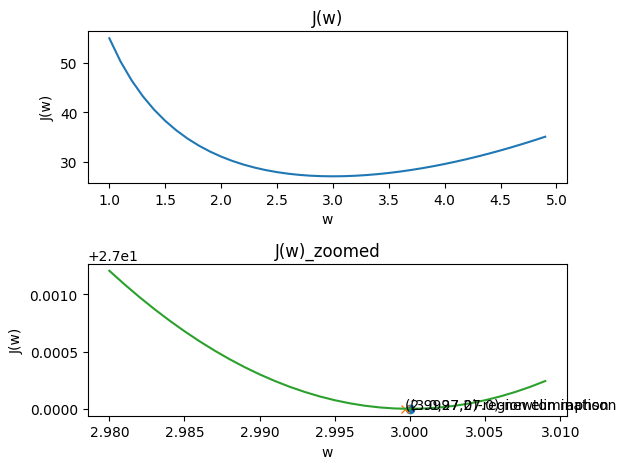

In [5]:
fig, ax= plt.subplots(2)

ax[0].set_title("J(w)")
ax[0].set_xlabel("w")
ax[0].set_ylabel("J(w)")

ax[1].set_title("J(w)_zoomed")
ax[1].set_xlabel("w")
ax[1].set_ylabel("J(w)")
ax[0].plot(np.arange(1,5,0.1),Q2(np.arange(1,5,0.1)))

ax[1].plot(critical_point,Q2(critical_point),marker='o')
ax[1].text(critical_point,Q2(critical_point),f"({round(critical_point,4)},{round(Q2(critical_point),4)})-region elimination")
ax[1].plot(critical_point_2,Q2(critical_point_2),marker='x')
ax[1].text(critical_point_2,Q2(critical_point_2),f"({round(critical_point_2,4)},{round(Q2(critical_point_2),4)})-newton raphson")
ax[1].plot(np.arange(2.98,3.01,0.001),Q2(np.arange(2.98,3.01,0.001)))

fig.tight_layout()
plt.show()


## 3- Use the code developed for Question 2 to find the critical point of the function f(w) = sin (w) in the interval (0,pi)  and verify the result manually using the optimality criteria (post this write-up  in .jped/.png etc). Plot the optimal points found by both methods. (5 marks , 3 +2)

Bracketed Range is (1.5676547341413178, 1.5739379194484975)
Critical point using Interval Halving is 1.5707963267949077
On rounding to 4 decimal places it is 1.5708

Critical point using Newton Raphson is 1.5706392546745518
On rounding to 4 decimal places it is 1.5706


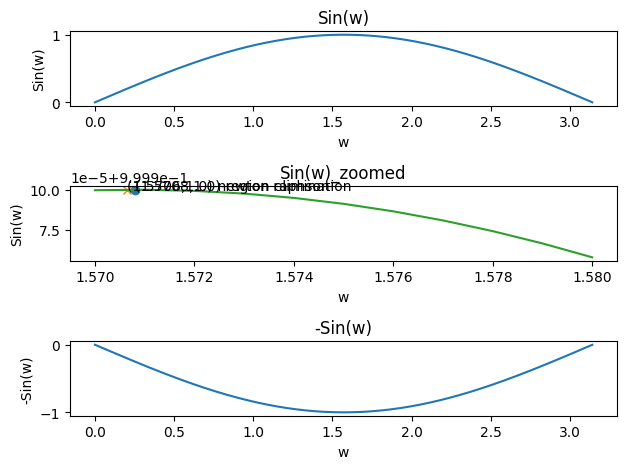

In [6]:
def Q3(w):
    return np.sin(w)

# The code in the previous question is to find critical point to find a minima. 
# Here we have a maxima. Maxima of a function f(x) is minima of a function -f(x).
# This means that we can take -sin(x) and solve for it's critical points, 
# it will give the critical points where -sin(x) goes minimum. 
# That will give points where sin(x) goes maximum ie give the value of x where it goes maximum.
# That will be the critical points.

def Q3_edited(w):
    return -np.sin(w)
bracket_sin=bracketing(0,np.pi,1000,Q3_edited)
interval_critical_sin=region_elimination(bracket_sin,0.001,sum(bracket_sin)/2,Q3_edited)
interval_critical_sin_2=newton_raphson(bracket_sin,0.0000000001,10000,Q3_edited)

print(f"Bracketed Range is {bracket_sin}")
print(f"Critical point using Interval Halving is {interval_critical_sin}")
print(f"On rounding to 4 decimal places it is {round(interval_critical_sin,4)}")
print()
print(f"Critical point using Newton Raphson is {interval_critical_sin_2}")
print(f"On rounding to 4 decimal places it is {round(interval_critical_sin_2,4)}")

fig, ax= plt.subplots(3)

ax[0].set_title("Sin(w)")
ax[0].set_xlabel("w")
ax[0].set_ylabel("Sin(w)")
ax[0].plot(np.arange(0,np.pi,0.001),Q3(np.arange(0,np.pi,0.001)))

ax[1].plot(interval_critical_sin,Q3(interval_critical_sin),marker='o')
ax[1].text(interval_critical_sin,Q3(interval_critical_sin),f"({round(interval_critical_sin,4)},{round(Q3(interval_critical_sin),4)})-region elimination")
ax[1].plot(interval_critical_sin_2,Q3(interval_critical_sin_2),marker='x')
ax[1].text(interval_critical_sin_2,Q3(interval_critical_sin_2),f"({round(interval_critical_sin_2,4)},{round(Q3(interval_critical_sin_2),4)})-newton raphson")
ax[1].plot(np.arange(1.57,1.58,0.001),Q3(np.arange(1.57,1.58,0.001)))
ax[1].set_title("Sin(w)_zoomed")
ax[1].set_xlabel("w")
ax[1].set_ylabel("Sin(w)")

ax[2].plot(np.arange(0,np.pi,0.01),Q3_edited(np.arange(0,np.pi,0.01)))
ax[2].set_title("-Sin(w)")
ax[2].set_xlabel("w")
ax[2].set_ylabel("-Sin(w)")
fig.tight_layout()
plt.show()